# Лабораторная работа 2

In [20]:
import pandas as pd

In [21]:
# 10 2012 MSE D F P N M J

In [22]:
df0 = pd.read_excel('2012.xls') # Чтение таблицы из эксель файла в датафрейм 
df0.head() # Смотрим первые пять строк датафрейма

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI,Weather Normalized Source EUI,Water per Square Foot,ENERGY STAR Score,GHG,Reported Building Square Footage,Reported Facility Type,Number of Buildings,Reported BINs
0,1000050010,115,BROAD STREET,MANHATTAN,10004,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000090001,34,WHITEHALL STREET,MANHATTAN,10004,Yes,1518.0,157.9,437.4,NaN,27.0,12077.53,852840.0,Office,1.0,1000018
2,1000090014,17,STATE STREET,MANHATTAN,10004,Yes,312.0,91.5,278.7,NaN,61.0,4817.62,574105.0,Office,1.0,1000020
3,1000090029,24,WHITEHALL STREET,MANHATTAN,10004,Yes,52.0,137.2,306.6,6.66,41.0,10190.38,859807.0,Office,1.0,1000021
4,1000100014,33,WHITEHALL STREET,MANHATTAN,10004,No DOF Record as of 08/01/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Cчитываем в новый датафрейм данные, которые нам нужны по варианту
df = df0[['Borough', 'Benchmarking Submission', 'Reported Facility Type', 'GHG', 'Reported Building Square Footage', 
          'Water per Square Foot', 'ENERGY STAR Score']]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Borough                           4081 non-null   object 
 1   Benchmarking Submission           4081 non-null   object 
 2   Reported Facility Type            2535 non-null   object 
 3   GHG                               2309 non-null   float64
 4   Reported Building Square Footage  2423 non-null   float64
 5   Water per Square Foot             385 non-null    float64
 6   ENERGY STAR Score                 1593 non-null   float64
dtypes: float64(4), object(3)
memory usage: 223.3+ KB


# Удаление плохих строк

In [25]:
df = df.dropna(subset=['ENERGY STAR Score']) # Удаляем наны в целевой переменной

In [26]:
df.info() # Выводим информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1593 entries, 1 to 4076
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Borough                           1593 non-null   object 
 1   Benchmarking Submission           1593 non-null   object 
 2   Reported Facility Type            1593 non-null   object 
 3   GHG                               1515 non-null   float64
 4   Reported Building Square Footage  1541 non-null   float64
 5   Water per Square Foot             252 non-null    float64
 6   ENERGY STAR Score                 1593 non-null   float64
dtypes: float64(4), object(3)
memory usage: 99.6+ KB


In [27]:
#  удаляем столбец потому что в нем слишком много NaN
df = df.drop(['Water per Square Foot'], axis=1)

In [28]:
# заполняем пропущенные значения в столбце GHG средним значением для столбца GHG
df['GHG'] = df['GHG'].fillna(df['GHG'].mean())

In [30]:
# заполняем пропущенные значения (NaN) в столбце средним значением для этого столбца
df['Reported Building Square Footage'] = df['Reported Building Square Footage'].fillna(df['Reported Building Square Footage'].mean())

In [32]:
# Считаем кол-во встречающихся значений для столбца Benchmarking Submission
df['Benchmarking Submission'].value_counts()

Yes    1593
Name: Benchmarking Submission, dtype: int64

In [34]:
# Так как в столбце Benchmarking Submission у нас только один ес, те значение только одно, 
# то оно ничего не даст для предсказания, и мы его просто выкидваем 
df = df.drop(['Benchmarking Submission'], axis = 1)

In [33]:
# Считаем кол-во встречающихся значений для столбца Reported Facility Type
df['Reported Facility Type'].value_counts()

Office                                     963
Warehouse (Unrefrigerated)                 150
Hotel                                      116
Retail                                      72
Senior Care Facility                        72
Residence Hall/Dormitory                    56
Hospital (General Medical and Surgical)     52
K-12 School                                 51
Medical Office                              21
House of Worship                            13
Warehouse (Refrigerated)                    11
Bank/Financial Institution                   8
Supermarket/Grocery                          6
Data Center                                  2
Name: Reported Facility Type, dtype: int64

In [35]:
# Кодируем ONE-HOT CODING
ohc_borough = pd.get_dummies(df['Borough'])
ohc_facility_type = pd.get_dummies(df['Reported Facility Type'])

In [41]:
# Выкидываем из нашей пандосовской таблицы столбец с районами и Reported Facility Type
df = df.drop(['Borough'], axis = 1)
df = df.drop(['Reported Facility Type'], axis = 1)

In [43]:
# Объединяем наш датафрейм с таблицей Ван хот кодирования районов 
df = pd.concat([df, ohc_borough, ohc_facility_type], axis=1)

In [44]:
df.shape

(1593, 22)

# Обучение

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt

In [46]:
labels = df['ENERGY STAR Score']
data = df.drop(['ENERGY STAR Score'], axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                   test_size = 0.3,
                                                   random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1115, 21)
(478, 21)
(1115,)
(478,)


Text(0.5, 1.0, 'Labels for test data')

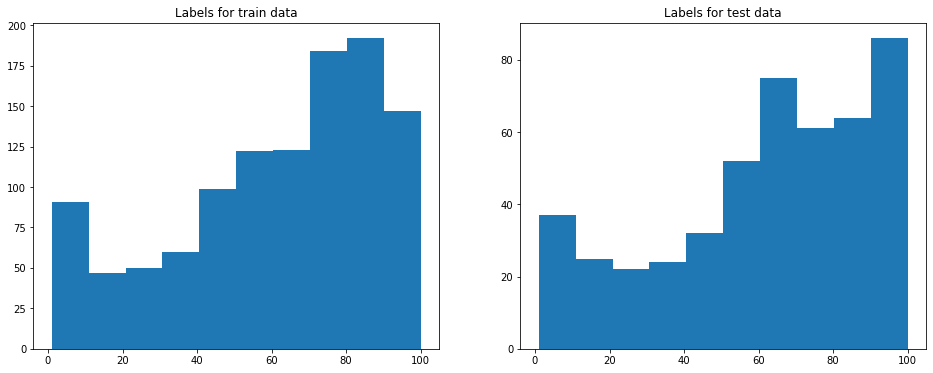

In [48]:
#Целевая функция на обучающей выборке и на отложенном тесте

# ГРАФИКИ ДОЛЖНЫ БЫТЬ ПОХОЖИ ДРУГ НА ДРУГА
# На них изображено по оси Х распределение Energy Star Score, разбитое на диапазоны [0, 10], [11, 20,] ... [91, 100]
# По оси Y - кол-во зданий с такими Energy Srar score

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.hist(y_train)
plt.title('train data')



plt.subplot(1,2,2)
plt.hist(y_test)
plt.title('test data')

In [49]:
#Модель
regressor = linear_model.LinearRegression()

In [50]:
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
# Оценим ошибку с помощью MSE
# Это нормально, что она такая большая. Т.к квадратичный критерий увеличивает значение "больших" ошибок и 
# уменьшает значения маленьких 

prediction = regressor.predict(X_test)
metrics.mean_squared_error(y_test, prediction)

737.6309918146738

In [54]:
# Сверим результаты предсказывания модели с реальными данными
# Реальные данные
print(y_test[:10])

1709    49.0
2336    17.0
2938    33.0
769     96.0
4029    67.0
210     94.0
2605    82.0
1072    78.0
2141    57.0
1295    29.0
Name: ENERGY STAR Score, dtype: float64


In [55]:
# предсказание сделанное моделью
print(prediction[:10])

[40.57074889 45.14907263 51.11898177 68.26257797 53.5580572  39.11085787
 60.97614299 68.21221808 56.04029383 40.45995815]
